## Importing the Libraries

In [1]:
# import data processing=
import pandas as pd

# import visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# import numpy
import numpy as np

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model  import Perceptron 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# matrics
from sklearn.metrics import accuracy_score

## Getting the Data

In [2]:
# importing from drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Creating DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/titanic/test.csv')


## Data Exploration/Analysis

In [4]:
# Getting info about data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Let’s take a more detailed look at what data is actually missing:

In [6]:
total_missing_values = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending =False)
missing_data = pd.DataFrame({"Total_missing_values":total_missing_values,"percentage":percent_2})

In [7]:
missing_data.head()

,Total_missing_values,percentage
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


## Age and Sex

In [8]:
df_train.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [9]:
# cross tab between age and sex
pd.crosstab(df_train.Age,df_train.Sex)

Sex,female,male
Age,,
0.42,0,1
0.67,0,1
0.75,2,0
0.83,0,2
0.92,0,1
...,...,...
70.00,0,2
70.50,0,1
71.00,0,2


In [10]:
# Counting unique values
df_train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [11]:
female = df_train[df_train["Sex"]=="female"]
female[female["Survived"]==1].Age.dropna()

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
874    28.0
875    15.0
879    56.0
880    25.0
887    19.0
Name: Age, Length: 197, dtype: float64

In [12]:
# Here X- Axis is the Age of male/female and y axis is the frequency count of each age

Text(0.5, 1.0, 'male')

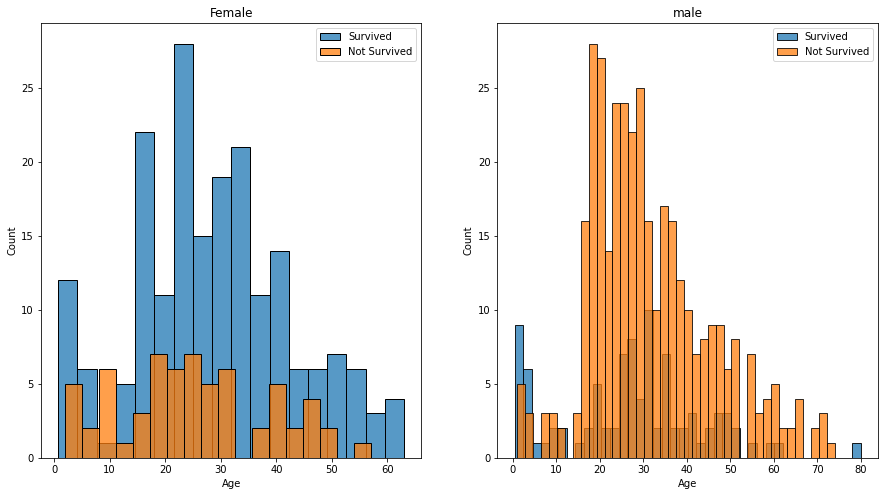

In [13]:
Survived      = "Survived"
Notsurvivied = "Not Survived"

male = df_train[df_train["Sex"]=="male"]
female = df_train[df_train["Sex"]=="female"]

fig,aixs = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
ax = sns.histplot(female[female["Survived"]==1].Age.dropna(),label=Survived,ax=aixs[0],kde =False,bins=18)
ax = sns.histplot(female[female["Survived"]==0].Age.dropna(),label=Notsurvivied,ax=aixs[0],kde =False,bins=18)
ax.legend()
ax.set_title("Female")

ax = sns.histplot(male[male["Survived"]==1].Age.dropna(),label=Survived,ax=aixs[1],kde =False,bins=40)
ax = sns.histplot(male[male["Survived"]==0].Age.dropna(),label=Notsurvivied,ax=aixs[1],kde =False,bins=40)
ax.legend()
ax.set_title("male")

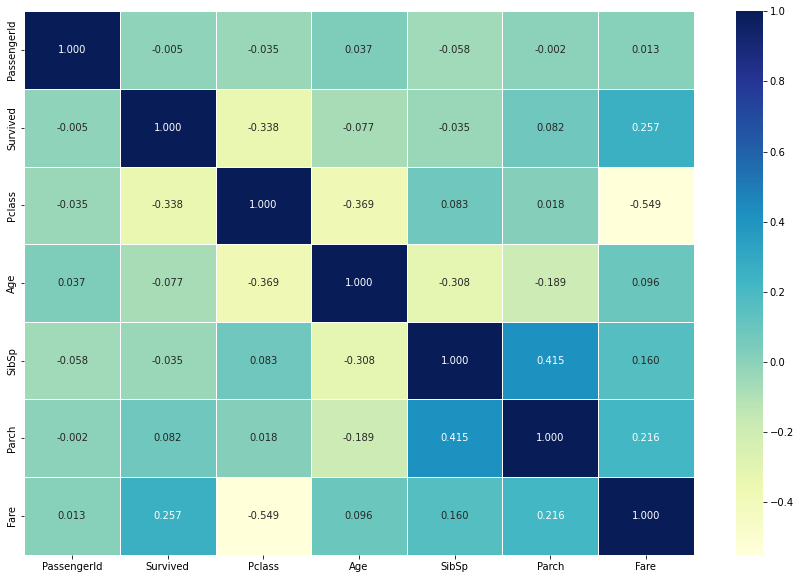

In [14]:
# check coef_
corr_metrix = df_train.corr()
fig, axis = plt.subplots(figsize=(15,10))
axis = sns.heatmap(corr_metrix,
annot=True,
linewidths=0.5,
cmap = "YlGnBu",
fmt = "2.3f",
)

# Data Preprocessing

#### Missing Data

###### **Age**

In [15]:
df_train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
data = [df_train,df_test]
for dataset in data:
  dataset["Age"] = df_train.Age.fillna(value=df_train.Age.median())
  dataset["Age"] = df_train.Age.astype(int)

In [17]:
# checking Age type
df_train.Age.dtypes

dtype('int64')

In [18]:
# checking Age missing values
df_train.Age.isna().sum()

0

In [19]:
df_train.Name.values[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [20]:
# Creating copy of each dataset
train_cpy = df_train.copy()
test_cpy = df_train.copy()

# listing train_cp, and test_cp in data variable
data = [train_cpy,test_cpy]
for dataset in data:
  titles = {"Mr": 1, "Mrs": 2, "Miss": 3, "Master": 4, "Rare": 5}

  ## for column in ["Name"]
  # Extracting the titles from the name using regular expression
  dataset["Title"] = dataset["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

  # Replacing the Rare titles with Rare
  dataset["Title"] = dataset["Title"].replace(["Dr","Rev","Major","Col","Countess","Capt","Sir","Lady","Don","Jonkheer"],"Rare")

  # Replacing the Mlle, Ms with Miss
  dataset["Title"] = dataset["Title"].replace(["Mlle","Ms"],"Miss")

  # Replacing the Mme with Mr
  dataset["Title"] = dataset["Title"].replace(["Mme"],"Mr")

  # converting titles into numbers
  dataset["Title"] = dataset["Title"].map(titles)

  # converting type
  dataset["Title"] = dataset["Title"].astype(int)

  # droping name column
  dataset.drop("Name",axis=1,inplace=True)
  dataset.Title.value_counts()

###### Cabin

In [21]:
dataset.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
deck = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"T":8}
# looping once

for dataset in data:
  # extracting string from Cabin Column
  dataset["Deck"] = dataset["Cabin"].str.extract("([A-Z])",expand=False)

  # mapping the deck dictionary with Deck column
  dataset["Deck"] = dataset["Deck"].map(deck)

  # filling value with 0 in nan
  dataset["Deck"] = dataset["Deck"].fillna(value=0)

  # converting type
  dataset["Deck"] = dataset["Deck"].astype(int)

  # removing the Cabin column
  dataset.drop("Cabin",axis=1,inplace=True)

In [23]:
# Getting data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Title        891 non-null    int64  
 11  Deck         891 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 83.7+ KB


In [24]:
# Chekcing if there is any missing data
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
Deck           0
dtype: int64

In [25]:
# Identifying unique data of Embarked
dataset.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
# Counting the value of each categorical values
dataset.Embarked.value_counts()  

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
# Filling the missing data in Embarked
for dataset in data:
  common_value="S"
  dataset.Embarked.fillna(value=common_value,inplace=True)

In [28]:
dataset.Sex.value_counts

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

## Creating Categories:

In [29]:
# Importing some of Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selecting the feature
features_categories = ["Embarked"]

# Instantiate of oneHotEncoder
onehot = OneHotEncoder()
# Using ColumnTransformer
preprocessor = ColumnTransformer(
                transformers=[("onehot",onehot,features_categories)],remainder="drop"
)
# Transforming the "Embarked" column
embarked_transformed_train  = preprocessor.fit_transform(train_cpy)
embarked_transformed_test = preprocessor.transform(train_cpy)

# Creating a new dataframe with the transformed "Embarked" column
embarked_df_train = pd.DataFrame(
              embarked_transformed_train.astype(int),
              columns = ["Embarked_S","Embarked_C","Embarked_Q"]
)
embarked_df_test = pd.DataFrame(
              embarked_transformed_test.astype(int),
              columns = ["Embarked_S","Embarked_C","Embarked_Q"]
)
# Concatenating the new dataframe with the original dataset
new_data_train_df = pd.concat([train_cpy,embarked_df_train],axis=1)
new_data_test_df = pd.concat([test_cpy,embarked_df_test],axis=1)

# Dropping the original "Embarked" column
new_data_train_df.drop("Embarked",axis=1,inplace=True)
new_data_test_df.drop("Embarked",axis=1,inplace=True)

In [30]:
# Converting sex into numerical
data =[ new_data_train_df,new_data_test_df]
for dataset in data:
  sex ={"male":0,"female":1}
  dataset["Sex"] = dataset.Sex.map(sex)

In [31]:
# viewing new columns
new_data_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Title', 'Deck', 'Embarked_S', 'Embarked_C',
       'Embarked_Q'],
      dtype='object')

In [32]:
# Again checking the types of data
new_data_train_df.Fare.values[:891]

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
         7.8958,  41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,
        21.6792,  17.8   ,  39.6875,   7.8   ,  76.7292,  26.    ,
        61.9792,  35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,
         7.2292,  80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,
        10.5   ,   8.1583,   7.925 ,   8.6625,  10.5   ,  46.9   ,
        73.5   ,  14.4542,  56.4958,   7.65  ,   7.8958,   8.05  ,
        29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,
        10.5   ,  15.85  ,  34.375 ,   8.05  , 263.    ,   8.0

In [33]:
# Droping Ticket
data =[new_data_train_df, new_data_test_df]
for dataset in data: 
  dataset.drop("Ticket",axis=1,inplace=True)

data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)sdfsdfsdfsdf

In [34]:
data =[new_data_train_df, new_data_test_df]
for dataset in data: 
  dataset.loc[dataset["Age"] <= 11,"Age"] = 0
  dataset.loc[(dataset["Age"] > 11) & (dataset["Age"] <=18),"Age"] = 1
  dataset.loc[(dataset["Age"] > 18) & (dataset["Age"] <=22),"Age"] = 2
  dataset.loc[(dataset["Age"] > 22) & (dataset["Age"] <=27),"Age"] = 3
  dataset.loc[(dataset["Age"] > 27) & (dataset["Age"] <=33),"Age"] = 4
  dataset.loc[(dataset["Age"] > 33) & (dataset["Age"] <=40),"Age"] = 5
  dataset.loc[(dataset["Age"] > 40) & (dataset["Age"] <=66),"Age"] = 6
  dataset.loc[dataset["Age"] > 66 ] = 6
new_data_train_df.Age.value_counts()

4    303
6    148
3    106
5    103
2     92
1     71
0     68
Name: Age, dtype: int64

For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category.

The "Pclass" column indicates which class of accommodation each passenger was traveling in. There were three classes on the Titanic: First Class, Second Class, and Third Class.
irst Class passengers had access to the most luxurious accommodations and amenities, while Third Class passengers had access to the most basic accommodations and amenities.

For example, the Age_Class feature could help to capture the fact that older passengers traveling in higher classes may have had a higher social status and may have been given priority in emergency situations, such as during the sinking of the Titanic.

In [35]:
# Age times Class
data = [new_data_train_df, new_data_test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

### Building Machine Learning Models

In [36]:
# Spliting the data
np.random.seed(42)
X_train,y_train = new_data_train_df.drop("Survived",axis=1),new_data_train_df["Survived"]

X_test,y_test = new_data_test_df.drop("Survived",axis=1),new_data_test_df["Survived"]


In [37]:
# dict of models
models = {
    "RandomForestClassifier":RandomForestClassifier(),
    "LogisticReression": LogisticRegression(),
    "Perceptron": Perceptron(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNN":KNeighborsClassifier(),
    "Linear_SVC": LinearSVC(),
    "SVC": SVC(),
    "GaussianNB":GaussianNB()
}


In [38]:
# Function to evaluate the models
def evaluate_models(models,X_train,y_train):
  results = {}
  for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test,y_test)
  return results

results = evaluate_models(models, X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [39]:
# Result
Result = pd.DataFrame(results,index=["Score"])

In [40]:
Result.T.sort_values(by="Score",ascending=False)

,Score
RandomForestClassifier,1.000000
DecisionTreeClassifier,1.000000
LogisticReression,0.805836
GaussianNB,0.793490
KNN,0.741863
Linear_SVC,0.727273
SVC,0.658810
Perceptron,0.423120


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define the RandomForestClassifier
rfc = RandomForestClassifier()

# Define the metrics with 'macro' averaging strategy
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Compute the scores with cross_val_score
Accuracy_score = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5, scoring=scoring['accuracy'])
Precision_score = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5, scoring=scoring['precision_macro'])
Recall_score = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5, scoring=scoring['recall_macro'])
F1_score = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5, scoring=scoring['f1_macro'])
result ={
    "Acuracy_score":Accuracy_score.mean(),
    "Precisoin_score":Precision_score.mean(),
    "Recall_score":Recall_score.mean(),
    "F1_score":F1_score.mean()
}
result

{'Acuracy_score': 0.813740505931831,
 'Precisoin_score': 0.8780431722610397,
 'Recall_score': 0.8671922248785464,
 'F1_score': 0.8702788049558847}

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)
# Define the DecisionTreeClassifier
dfc = DecisionTreeClassifier()

# Define the metrics with 'macro' averaging strategy
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Compute the scores with cross_val_score
Accuracy_score = cross_val_score(estimator=dfc, X=X_train, y=y_train, cv=5, scoring=scoring['accuracy'])
Precision_score = cross_val_score(estimator=dfc, X=X_train, y=y_train, cv=5, scoring=scoring['precision_macro'])
Recall_score = cross_val_score(estimator=dfc, X=X_train, y=y_train, cv=5, scoring=scoring['recall_macro'])
F1_score = cross_val_score(estimator=dfc, X=X_train, y=y_train, cv=5, scoring=scoring['f1_macro'])
result ={
    "Acuracy_score":Accuracy_score.mean(),
    "Precisoin_score":Precision_score.mean(),
    "Recall_score":Recall_score.mean(),
    "F1_score":F1_score.mean()
}
result

{'Acuracy_score': 0.730820413031197,
 'Precisoin_score': 0.7971420922544609,
 'Recall_score': 0.8241541258912228,
 'F1_score': 0.7328579198044584}

In [43]:
np.random.seed(42)
# Define the Logistic
lrc = LogisticRegression()

# Define the metrics with 'macro' averaging strategy
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Compute the scores with cross_val_score
Accuracy_score = cross_val_score(estimator=lrc, X=X_train, y=y_train, cv=5, scoring=scoring['accuracy'])
Precision_score = cross_val_score(estimator=lrc, X=X_train, y=y_train, cv=5, scoring=scoring['precision_macro'])
Recall_score = cross_val_score(estimator=lrc, X=X_train, y=y_train, cv=5, scoring=scoring['recall_macro'])
F1_score = cross_val_score(estimator=lrc, X=X_train, y=y_train, cv=5, scoring=scoring['f1_macro'])
result ={
    "Acuracy_score":Accuracy_score.mean(),
    "Precisoin_score":Precision_score.mean(),
    "Recall_score":Recall_score.mean(),
    "F1_score":F1_score.mean()
}
result

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'Acuracy_score': 0.791224656330425,
 'Precisoin_score': 0.853567860849606,
 'Recall_score': 0.8476545701085618,
 'F1_score': 0.84979819659704}

### Hyperparameter Tuning

In [44]:
# Randomized Grid Search
from sklearn.model_selection import RandomizedSearchCV
rs_rfc_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
 }

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            rs_rfc_grid,
                            n_iter=20,
                            random_state=42,
                            verbose =True,
                            refit=True,
                            cv=5)
rs_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=True)

In [45]:
rs_rfc.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [46]:
# Randomized Grid Search
from sklearn.model_selection import GridSearchCV

grid_2 = {'n_estimators': [50, 100, 150],
          'max_depth': [30, None],
          'max_features': ['sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [1, 2, 4]}

gs_rfc = GridSearchCV(RandomForestClassifier(),
                            grid_2,
                            verbose =True,
                            refit=True,
                            cv=5)
gs_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=True)

In [47]:
gs_rfc.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [55]:
# Adding best hyperparameters from RandomizedSearchCV
rfc = RandomForestClassifier(n_estimators = 1600,
 min_samples_split = 2,
 min_samples_leaf = 4,
 max_features = 'sqrt',
 max_depth = 30,
 bootstrap = True,
 random_state=42)

# Fit data to the model
rfc.fit(X_train,y_train)

# Score
rfc.score(X_test,y_test)

0.8866442199775533

In [56]:
# predicting
y_preds = rfc.predict(X_test)


In [57]:
#Accuracy Score
score = accuracy_score(y_test,y_preds)
score

0.8866442199775533

In [54]:
# Feature importance
rfc.feature_importances_

array([0.08163494, 0.08536693, 0.20250985, 0.03514615, 0.04533179,
       0.02165759, 0.12737594, 0.2344015 , 0.05565347, 0.01502374,
       0.01145913, 0.01783195, 0.06660703])

In [76]:
import pandas as pd

# create a dictionary of feature importances with feature names as keys
feature_dict = dict(zip(new_data_train_df.columns, rfc.feature_importances_))

# print the sorted DataFrame
feature_dict

{'PassengerId': 0.08163494487358727,
 'Survived': 0.08536693456545227,
 'Pclass': 0.20250984502176655,
 'Sex': 0.03514615125308239,
 'Age': 0.0453317891430289,
 'SibSp': 0.021657585534197513,
 'Parch': 0.1273759364560737,
 'Fare': 0.23440149504265614,
 'Title': 0.0556534711389651,
 'Deck': 0.015023740380949146,
 'Embarked_S': 0.011459125122350566,
 'Embarked_C': 0.017831953043095327,
 'Embarked_Q': 0.06660702842479506}

<Axes: title={'center': 'Feature important'}>

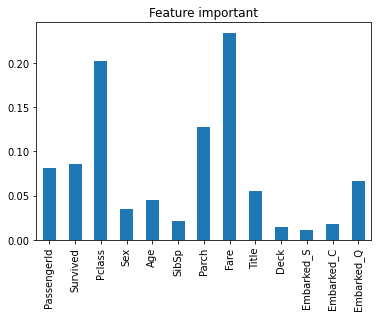

In [74]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature important",legend=False)

In [78]:
# import joblib
from joblib import dump
# Save the model to a file
dump(rfc, 'rfc_model.joblib')

['rfc_model.joblib']